<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [0]:
df.describe()

,make,price,body,mileage,engV,engType,registration,year,drive
count,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000
mean,46.535491,16185.453305,2.302295,141.744202,2.568337,1.650618,0.941613,2006.500883,0.575868
std,24.526251,24449.641512,1.610307,97.464062,5.387238,1.341282,0.234488,6.925907,0.741235
min,0.000000,259.350000,0.000000,0.000000,0.100000,0.000000,0.000000,1959.000000,0.000000
25%,23.000000,5490.000000,1.000000,74.000000,1.600000,0.000000,1.000000,2004.000000,0.000000
50%,50.000000,9500.000000,3.000000,130.000000,2.000000,1.000000,1.000000,2008.000000,0.000000
75%,68.000000,17145.600000,3.000000,197.000000,2.500000,3.000000,1.000000,2011.000000,1.000000
max,82.000000,547800.000000,5.000000,999.000000,99.990000,3.000000,1.000000,2016.000000,2.000000


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
# All columns except for price
X = df.loc[:, df.columns != 'price']
X = X.as_matrix()

# Target
y = df[['price']]

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
# fit model using train datasets
model = LinearRegression()
model.fit(X_train, y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))
R2 = r2_score(y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 20338.843481632102
R^2 is 0.30479352255023606


## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [0]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[  -33.80914554 -1721.02501098   -39.96352172   272.10204943
  -1085.33344434  4487.51810936  1145.2506681   8462.04541339]]
Intercept: [-2278702.14904547]


Each of the coefficients tell us how much the predictor variables increase as the response variable (price) increases.

## 1.5 Use the test data to make predictions

In [0]:
df.describe()

,make,price,body,mileage,engV,engType,registration,year,drive
count,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000
mean,46.535491,16185.453305,2.302295,141.744202,2.568337,1.650618,0.941613,2006.500883,0.575868
std,24.526251,24449.641512,1.610307,97.464062,5.387238,1.341282,0.234488,6.925907,0.741235
min,0.000000,259.350000,0.000000,0.000000,0.100000,0.000000,0.000000,1959.000000,0.000000
25%,23.000000,5490.000000,1.000000,74.000000,1.600000,0.000000,1.000000,2004.000000,0.000000
50%,50.000000,9500.000000,3.000000,130.000000,2.000000,1.000000,1.000000,2008.000000,0.000000
75%,68.000000,17145.600000,3.000000,197.000000,2.500000,3.000000,1.000000,2011.000000,1.000000
max,82.000000,547800.000000,5.000000,999.000000,99.990000,3.000000,1.000000,2016.000000,2.000000


In [0]:
# Predicted price from test data
model.predict(X_test)

array([[19194.45968216],
       [ 5367.93233327],
       [26151.89784368],
       ...,
       [21790.01574206],
       [11486.29535553],
       [ 8099.62613193]])

In [0]:
# Predicted price for new values of X
print(model.predict([[40,4,134,2,3,1,2003,2]]))

[[20343.17407832]]


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [0]:
y_pred = model.predict(X_test)
# Root mean squared error
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred)**0.5)

# R^2
print('R^2: %.2f' % r2_score(y_test, y_pred))

RMSE: 20338.84
R^2: 0.30


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

That coefficient is 1145.2506681. It tells us how much the price increases for every year.

## 1.8 How should we interpret the Root-Mean-Square Error?

RMSE measures how accurately the model predicts the target in units of the target variable. It tells us that the difference between predicted and actual values is $20,338, so our model is off by that much.

## 1.9 How should we interpret the $R^2$?

It's how close our data is to the regression line, the close to 1 the better. In our case it's .3 so this model is most likely a bad one.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df['price'])
df.drop('price',inplace=True,axis=1)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

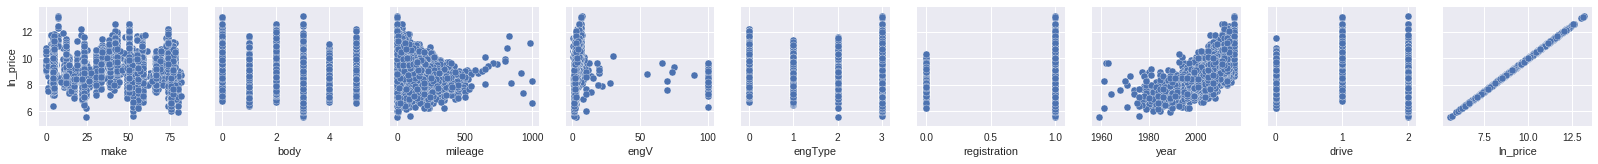

In [0]:
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=df.columns)

Year and mileage have a somewhat rounded distribition. Let's see what their plot of residuals looks like.

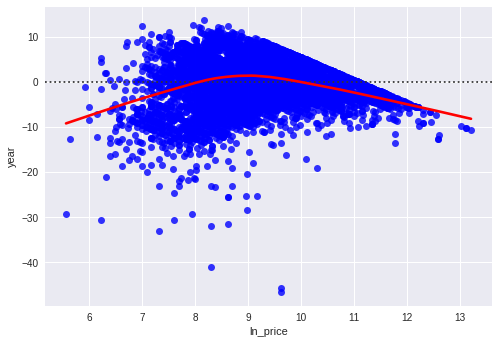

In [0]:
sns.residplot('ln_price','year',data=df, lowess=True, color="r", scatter_kws={'color':'blue'})

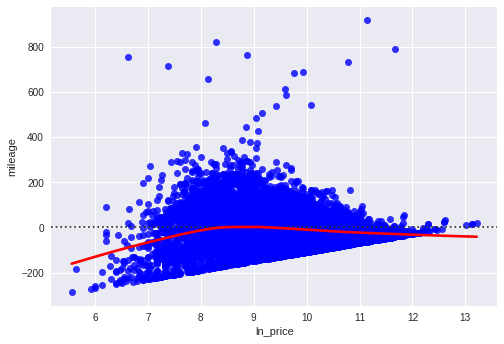

In [0]:
sns.residplot('ln_price','mileage',data=df, lowess=True, color="r", scatter_kws={'color':'blue'})

Indeed, the residual plots as well as the scatter plots sigal that these features are non-linear and are cadidates for polynomial forms.

## 2.3 If appropriate, create any polynomial features. 

In [0]:
# Polynomial forms from above features
df['year_sq'] = df['year'] ** 2
df['mileage_sq'] = df['mileage'] ** 2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
# Variables for new model
X = df.loc[:, df.columns != 'ln_price']
X = X.as_matrix()
y = df[['ln_price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit model using train datasets
model = LinearRegression()
model.fit(X_train, y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))
R2 = r2_score(y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

RMSE is 0.5601810614773765
R^2 is 0.6673200533044763
Coefficients: [[-1.58593075e-03 -9.08588225e-02  8.30293823e-04  8.36898949e-03
  -4.82683704e-02  6.68996735e-01 -6.22770897e+00  3.79209427e-01
   1.58095289e-03 -2.97644684e-07]]
Intercept: [6139.40348742]


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

That coefficient is 9.54543580e-02 . 

Because we only log transformed our y but not the Xs, we have to factor that in when interpreting the coefficients. We have to exponentiate the coefficient and subtract number from 1 and multiply by 100 to get the % price increase per year.

In [0]:
(np.exp(.0952)-1)*100

9.987880889177148

For every year, the price of the car increases by almost 10 percent.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

The sum of squared errors is one cost function that it could minimize as we descend to local minima.

## 3.2 What is the "Learning Rate" and what is its function?

* The size of the steps as the gradient descends to local minima. Its function is to find the optimal rate of descent where taking bigger steps at the maxima and taking smaller steps near the minima give us the smallest possible loss. 

* To get the best possible learning rate, we can train the model initially with a very low learning rate and increase it (either linearly or exponentially) at each iteration. Then we graph learning rate vs loss to see where it's optimal.

* Another interesting way to find these hyperparameters is [population based training](https://deepmind.com/blog/population-based-training-neural-networks/). Here a population of models with different learning rates and optimizers is trained in parallel and accuracies are compared.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [0]:
X = df.loc[:, df.columns != 'ln_price']
y = df[['ln_price']]

def regression_statsmodel(y,X):
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit(cov_type='HC3')
  predictions = model.predict(X) 
  print(model.summary())
  
regression_statsmodel(y,X)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1693.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:53:44   Log-Likelihood:                -6963.9
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8484   BIC:                         1.403e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6524.4284    685.467      9.518   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [0]:
print(X.columns)

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
[c+': '+str(round(v,2)) for c, v in zip(X.columns, vif)]

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'year_sq', 'mileage_sq'],
      dtype='object')


['make: 4.87',
 'body: 3.56',
 'mileage: 16.9',
 'engV: 1.24',
 'engType: 2.89',
 'registration: 18.77',
 'year: 128455.84',
 'drive: 1.82',
 'year_sq: 127380.79',
 'mileage_sq: 6.24']

VIFs > 5 signal multi colinearity problems in year, registration, year_sq, and mileage_sq.